In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# IHC

In [2]:
ihc_micro_md = pd.read_table('../data/Microbiome/longIHC_micro_metadata_cleaned.txt', sep='\t', index_col=0)
ihc_micro_md.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,dna_extracted,dob,...,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,timepoint,title,treatment
sample_name,,,,,,,,,,,,,,,,,,,,,
11548.A15.85.1,A15.85.1,not applicable,On shelf,Fighting cage,A15,2017-09-26 11:00,Mouse 85 baseline stool collection 1 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.1,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A15.85.10,A15.85.10,64,On shelf,Started changing air cages 4x/wk 10/26/2017,A15,2017-10-27 11:00,Mouse 85 stool collection 10 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A15.85.10.b,A15.85.10,64,On shelf,Started changing air cages 4x/wk 10/26/2017,A15,2017-10-27 11:00,Mouse 85 stool collection 10 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A15.85.11,A15.85.11,96.7,On shelf,NaN,A15,2017-10-31 11:00,Mouse 85 stool collection 11 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.11,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A15.85.11.b,A15.85.11,96.7,On shelf,NaN,A15,2017-10-31 11:00,Mouse 85 stool collection 11 of 20,Regular chow,True,7/18/17,...,True,11548,A15.85.11,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided


In [3]:
ihc_micro_pcoa = pd.read_table('../data/Microbiome/longIHC_wUF_pcoa_graph.txt', sep='\t', index_col=0)
ihc_micro_pcoa.head()

,Axis1_34_5,Axis2_23_9,Axis3_07_5
sample-id,,,
11548.A19.103.10,-0.466966,-0.060712,-0.070013
11548.A19.102.16,-0.225306,-0.088962,-0.001793
11548.A21.110.9,0.231109,0.104939,0.234551
11548.A18.97.19,-0.457175,-0.056434,-0.045112
11548.A18.98.10,-0.515602,-0.064820,-0.069005


In [4]:
ihc_micro_wUF = pd.merge(ihc_micro_pcoa, ihc_micro_md, left_index=True, right_index=True)
ihc_micro_wUF

,Axis1_34_5,Axis2_23_9,Axis3_07_5,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,...,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,timepoint,title,treatment
11548.A19.103.10,-0.466966,-0.060712,-0.070013,A19.103.10,25.8,In Chamber,NaN,A19,2017-10-27 10:00,Mouse 103 stool collection 10 of 20,...,True,11548,A19.103.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A19.102.16,-0.225306,-0.088962,-0.001793,A19.102.16,23.6,In Chamber,NaN,A19,2017-11-17 10:00,Mouse 102 stool collection 16 of 20,...,True,11548,A19.102.16,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A21.110.9,0.231109,0.104939,0.234551,A21.110.9,50.3,On shelf,NaN,A21,2017-10-24 10:45,Mouse 110 stool collection 9 of 20,...,True,11548,A21.110.9,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A18.97.19,-0.457175,-0.056434,-0.045112,A18.97.19,39.7,In Chamber,New bag of food,A18,2017-11-28 10:00,Mouse 97 stool collection 19 of 20,...,True,11548,A18.97.19,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A18.98.10,-0.515602,-0.064820,-0.069005,A18.98.10,30.5,In Chamber,NaN,A18,2017-10-27 10:00,Mouse 98 stool collection 10 of 20,...,True,11548,A18.98.10,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548.A22.115.4,0.132077,0.021061,0.022263,A22.115.4,37.5,On shelf,NaN,A22,2017-10-06 10:45,Mouse 115 stool collection 4 of 20,...,True,11548,A22.115.4,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A19.101.11,0.037301,0.005262,0.002444,A19.101.11,31,In Chamber,NaN,A19,2017-10-31 10:00,Mouse 101 stool collection 11 of 20,...,True,11548,A19.101.11,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided
11548.A18.97.14,-0.347881,-0.169233,0.045838,A18.97.14,26.9,In Chamber,New bag of food,A18,2017-11-07 11:00,Mouse 97 stool collection 14 of 20,...,True,11548,A18.97.14,feces,mouse gut metagenome,male,410661,NaN,10 week IHC,NaN
11548.A18.100.17,-0.107666,0.049711,-0.039133,A18.100.17,40.5,In Chamber,New bag of food,A18,2017-11-21 10:00,Mouse 100 stool collection 17 of 20,...,True,11548,A18.100.17,feces,mouse gut metagenome,male,410661,Not provided,10 week IHC,Missing: Not provided


In [5]:
ihc_micro_wUF2 = ihc_micro_wUF.drop(ihc_micro_wUF.index[ihc_micro_wUF.host_age == 20])

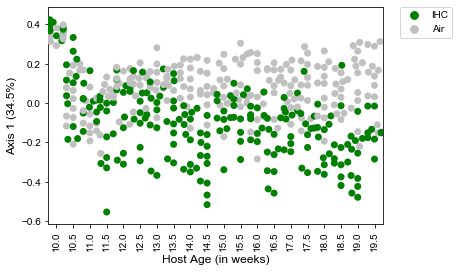

In [37]:
sns.swarmplot(x='host_age', y='Axis1_34_5', hue='exposure_type', size=7,
              palette=['green', 'silver'], data=ihc_micro_wUF2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (34.5%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIHC_micro_wUF_pcoa.svg', dpi=300, bbox_inches="tight")

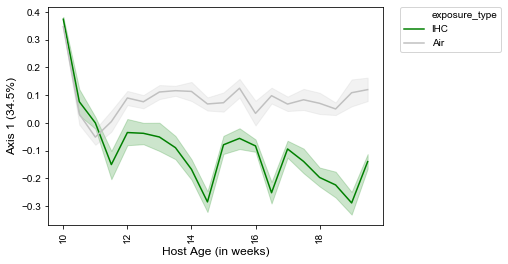

In [35]:
sns.lineplot(x='host_age', y='Axis1_34_5', hue='exposure_type', ci=68,
              palette=['green', 'silver'], data=ihc_micro_wUF2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (34.5%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/longIHC_micro_wUF_pcoa.svg', dpi=300, bbox_inches="tight")

In [7]:
ihc_metab_md = pd.read_table('../data/Metabolome/longIHC_metab_metadata_cleaned.txt', sep='\t', index_col=0)
ihc_metab_md.head()

,filename,micro-sample-id,cage_food_consumption_g,cage_location,cage_number,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
sample-id,,,,,,,,,,,,,,,
A15_85_01,A15_85_01.mzXML,11548.A15.85.1,not applicable,On shelf,A15,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 85,26.5,g,85,feces
A15_85_02,A15_85_02.mzXML,11548.A15.85.2,56.6,On shelf,A15,Regular chow,Air,ApoE KO,10.5,weeks,Mouse 85,26.7,g,85,feces
A15_85_03,A15_85_03.mzXML,11548.A15.85.3,85.9,On shelf,A15,Regular chow,Air,ApoE KO,11.0,weeks,Mouse 85,27.2,g,85,feces
A15_85_04,A15_85_04.mzXML,11548.A15.85.4,59.3,On shelf,A15,Regular chow,Air,ApoE KO,11.5,weeks,Mouse 85,27.4,g,85,feces
A15_85_05,A15_85_05.mzXML,11548.A15.85.5,81,On shelf,A15,Regular chow,Air,ApoE KO,12.0,weeks,Mouse 85,27.6,g,85,feces


In [8]:
ihc_metab_pcoa = pd.read_table('../data/Metabolome/longIHC_metab_canberrra_pcoa_graph.txt', sep='\t', index_col=0)
ihc_metab_pcoa.head()

,Axis1_36_1,Axis2_08_8
sample-id,,
A18_100_20,90.595755,-338.536630
A18_100_15,138.860570,-462.407482
A18_100_10,56.482731,-403.187525
A18_97_10,3.536735,-422.242738
A18_100_01,-883.305389,37.954769


In [9]:
ihc_metab_canberra = pd.merge(ihc_metab_pcoa, ihc_metab_md, left_index=True, right_index=True)
ihc_metab_canberra.head()

,Axis1_36_1,Axis2_08_8,filename,micro-sample-id,cage_food_consumption_g,cage_location,cage_number,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
sample-id,,,,,,,,,,,,,,,,,
A18_100_20,90.595755,-338.536630,A18_100_20.mzXML,11548.A18.100.20,28.5,In Chamber,A18,HFD,IHC,ApoE KO,19.5,weeks,Mouse 100,26.3,g,100,feces
A18_100_15,138.860570,-462.407482,A18_100_15.mzXML,11548.A18.100.15,40.2,In Chamber,A18,HFD,IHC,ApoE KO,17.0,weeks,Mouse 100,26,g,100,feces
A18_100_10,56.482731,-403.187525,A18_100_10.mzXML,11548.A18.100.10,30.5,In Chamber,A18,HFD,IHC,ApoE KO,14.5,weeks,Mouse 100,26.6,g,100,feces
A18_97_10,3.536735,-422.242738,A18_97_10.mzXML,11548.A18.97.10,30.5,In Chamber,A18,HFD,IHC,ApoE KO,14.5,weeks,Mouse 97,28.1,g,97,feces
A18_100_01,-883.305389,37.954769,A18_100_01.mzXML,11548.A18.100.1,not applicable,In Chamber,A18,HFD,IHC,ApoE KO,10.0,weeks,Mouse 100,26.1,g,100,feces


In [10]:
ihc_metab_canberra['new_Axis1'] = ihc_metab_canberra['Axis1_36_1']*(-1)

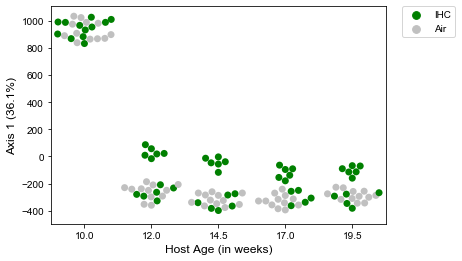

In [38]:
sns.swarmplot(x='host_age', y='new_Axis1', hue='exposure_type', size=7,
              palette=['green', 'silver'], data=ihc_metab_canberra)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (36.1%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIHC_metab_canberra_pcoa.svg', dpi=300, bbox_inches="tight")

# IH_IC Experiment

In [12]:
ihic_micro_md = pd.read_table('../data/Microbiome/long_IH_IC_MetaData.txt', sep='\t', index_col=0)
ihic_micro_md.head()

,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample_name,,,,,,,,,,,,,,,,,,,,,
11829.A34.135.1,A34_135_1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.10,A34_135_10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.11,A34_135_11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.12,A34_135_12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A34.135.13,A34_135_13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [13]:
ihic_metab_md = pd.read_table('../data/Metabolome/Haddad_IH_IC_MetaData.txt', sep='\t', index_col=0)
ihic_metab_md.head()

,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A34_135_1,11829.A34.135.1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_10,11829.A34.135.10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_11,11829.A34.135.11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_12,11829.A34.135.12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_13,11829.A34.135.13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


# Air vs IH

In [14]:
ih_air_micro_pcoa = pd.read_table('../data/Microbiome/longIH_wUF_pcoa_graph.txt', sep='\t', index_col=0)
ih_air_micro_pcoa.head()

,Axis1_31_2,Axis2_18_3,Axis3_10_9
sample-id,,,
11829.A45.181.8,-0.193405,0.171923,-0.014028
11829.A37.147.17,-0.254269,0.128335,0.185929
11829.A44.175.10,0.059737,0.070537,0.030176
11829.A36.146.11,-0.112533,-0.106597,-0.018982
11829.A38.152.6,0.225875,0.048720,0.074469


In [15]:
ih_air_micro_wUF = pd.merge(ih_air_micro_pcoa, ihic_micro_md, left_index=True, right_index=True)
ih_air_micro_wUF.head()

,Axis1_31_2,Axis2_18_3,Axis3_10_9,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
11829.A45.181.8,-0.193405,0.171923,-0.014028,A45_181_8,weeks,A45.181.8,40.3,On shelf,NaN,A45,...,Mouse 181,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A37.147.17,-0.254269,0.128335,0.185929,A37_147_17,weeks,A37.147.17,51.8,In chamber,NaN,A37,...,Mouse 147,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A44.175.10,0.059737,0.070537,0.030176,A44_175_10,weeks,A44.175.10,28.5,On shelf,NaN,A44,...,Mouse 175,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A36.146.11,-0.112533,-0.106597,-0.018982,A36_146_11,weeks,A36.146.11,42.7,In chamber,NaN,A36,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A38.152.6,0.225875,0.048720,0.074469,A38_152_6,weeks,A38.152.6,34.8,In chamber,Mixed leftovers from 2 bags of food,A38,...,Mouse 152,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


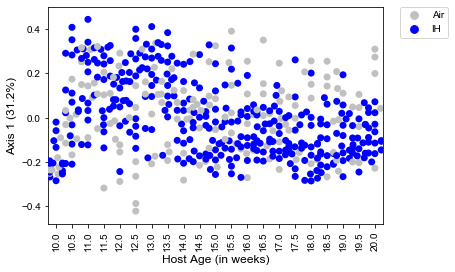

In [39]:
sns.swarmplot(x='host_age', y='Axis1_31_2', hue='exposure_type', size=7,
              palette=['silver', 'blue'], data=ih_air_micro_wUF)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (31.2%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIH_micro_wUF_pcoa.svg', dpi=300, bbox_inches="tight")

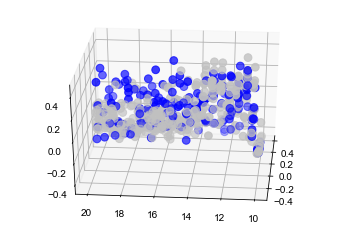

In [17]:
import matplotlib.colors as clrs
fig = plt.figure()
ih_air_micro_wUF['exposure_type']=pd.Categorical(ih_air_micro_wUF['exposure_type'])
my_color = ih_air_micro_wUF['exposure_type'].cat.codes
cmap_ih_air = clrs.ListedColormap(["blue", "silver"])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ih_air_micro_wUF['Axis2_18_3'], ih_air_micro_wUF['host_age'], ih_air_micro_wUF['Axis1_31_2'], 
           c=my_color, cmap=cmap_ih_air, s=60)
ax.view_init(30, 185)
plt.show()

In [18]:
ih_air_metab_pcoa = pd.read_table('../data/Metabolome/longIH_metab_canberra_pcoa_graph.txt', sep='\t', index_col=0)
ih_air_metab_pcoa.head()

,Axis1_21_6,Axis2_08_2
sample-id,,
A36_144_2,121.608837,226.455727
A36_145_2,9.224839,6.163140
A36_146_2,-28.279894,-72.541831
A36_145_1,554.251759,31.626271
A36_146_11,-156.341773,-79.094644


In [19]:
ih_air_metab_canberra = pd.merge(ih_air_metab_pcoa, ihic_metab_md, left_index=True, right_index=True)
ih_air_metab_canberra.head()

,Axis1_21_6,Axis2_08_2,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A36_144_2,121.608837,226.455727,11829.A36.144.2,weeks,A36.144.2,34.4,In chamber,NaN,A36,4/6/18 10:00,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,9.224839,6.163140,11829.A36.145.2,weeks,A36.145.2,34.4,In chamber,NaN,A36,4/6/18 10:00,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,-28.279894,-72.541831,11829.A36.146.2,weeks,A36.146.2,34.4,In chamber,NaN,A36,4/6/18 10:00,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,554.251759,31.626271,11829.A36.145.1,weeks,A36.145.1,Not applicable,In chamber,NaN,A36,4/3/18 10:00,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_11,-156.341773,-79.094644,11829.A36.146.11,weeks,A36.146.11,42.7,In chamber,NaN,A36,5/8/18 10:00,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


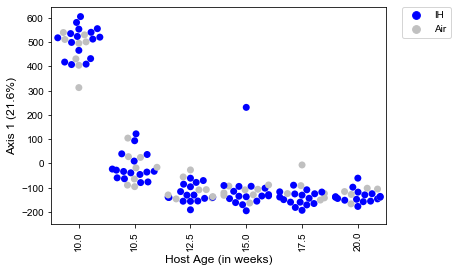

In [40]:
sns.swarmplot(x='host_age', y='Axis1_21_6', hue='exposure_type', size=7,
              palette=['blue', 'silver'], data=ih_air_metab_canberra)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (21.6%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIH_metab_canberra_pcoa.svg', dpi=300, bbox_inches="tight")

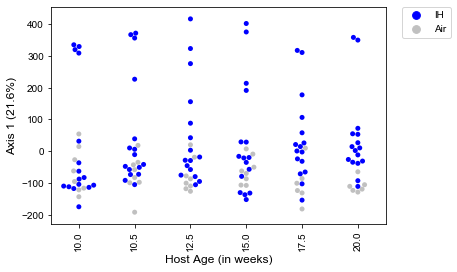

In [21]:
sns.swarmplot(x='host_age', y='Axis2_08_2', hue='exposure_type', 
              palette=['blue', 'silver'], data=ih_air_metab_canberra)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (21.6%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/longIH_metab_canberra_pcoa.svg', dpi=300, bbox_inches="tight")

# Air vs IC

In [22]:
ic_air_micro_pcoa = pd.read_table('../data/Microbiome/longIC_wUF_pcoa_graph.txt', sep='\t', index_col=0)
ic_air_micro_pcoa.head()

,Axis1_33_9,Axis2_21_0,Axis3_08_9
sample-id,,,
11829.A45.181.8,0.232152,0.031504,-0.139206
11829.A43.172.9,-0.129576,-0.031769,0.023250
11829.A44.175.10,-0.032275,-0.000751,-0.079443
11829.A45.179.13,0.258927,0.010105,0.155022
11829.A41.163.10,-0.168126,-0.053368,0.033646


In [23]:
ic_air_micro_wUF = pd.merge(ic_air_micro_pcoa, ihic_micro_md, left_index=True, right_index=True)
ic_air_micro_wUF.head()

,Axis1_33_9,Axis2_21_0,Axis3_08_9,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
11829.A45.181.8,0.232152,0.031504,-0.139206,A45_181_8,weeks,A45.181.8,40.3,On shelf,NaN,A45,...,Mouse 181,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A43.172.9,-0.129576,-0.031769,0.023250,A43_172_9,weeks,A43.172.9,40.1,In chamber,New bag of food,A43,...,Mouse 172,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A44.175.10,-0.032275,-0.000751,-0.079443,A44_175_10,weeks,A44.175.10,28.5,On shelf,NaN,A44,...,Mouse 175,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A45.179.13,0.258927,0.010105,0.155022,A45_179_13,weeks,A45.179.13,50.2,On shelf,New lot of food,A45,...,Mouse 179,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A41.163.10,-0.168126,-0.053368,0.033646,A41_163_10,weeks,A41.163.10,33.3,In chamber,NaN,A41,...,Mouse 163,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


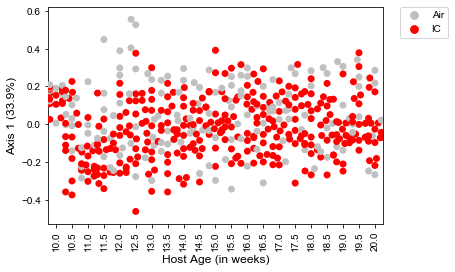

In [41]:
sns.swarmplot(x='host_age', y='Axis1_33_9', hue='exposure_type', size=7,
              palette=['silver', 'red'], data=ic_air_micro_wUF)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (33.9%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIC_micro_wUF_pcoa.svg', dpi=300, bbox_inches="tight")

In [25]:
ic_air_metab_pcoa = pd.read_table('../data/Metabolome/longIC_metab_canberra_pcoa_graph.txt', sep='\t', index_col=0)
ic_air_metab_pcoa.head()

,Axis1_25_4,Axis2_07_0
sample-id,,
A40_160_2,-64.922937,141.126165
A41_164_2,-80.255024,2.560770
A41_163_2,-31.492604,148.973786
A41_164_1,373.373110,-81.092807
A40_160_6,-125.762410,29.244103


In [26]:
ic_air_metab_canberra = pd.merge(ic_air_metab_pcoa, ihic_metab_md, left_index=True, right_index=True)
ic_air_metab_canberra.head()

,Axis1_25_4,Axis2_07_0,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A40_160_2,-64.922937,141.126165,11829.A40.160.2,weeks,A40.160.2,44.8,In chamber,NaN,A40,4/6/18 11:00,...,Mouse 160,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A41_164_2,-80.255024,2.560770,11829.A41.164.2,weeks,A41.164.2,41.8,In chamber,NaN,A41,4/6/18 11:00,...,Mouse 164,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A41_163_2,-31.492604,148.973786,11829.A41.163.2,weeks,A41.163.2,41.8,In chamber,NaN,A41,4/6/18 11:00,...,Mouse 163,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A41_164_1,373.373110,-81.092807,11829.A41.164.1,weeks,A41.164.1,Not applicable,In chamber,NaN,A41,4/3/18 11:00,...,Mouse 164,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A40_160_6,-125.762410,29.244103,11829.A40.160.6,weeks,A40.160.6,37.7,In chamber,Mixed leftovers from 2 bags of food,A40,4/20/18 11:00,...,Mouse 160,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


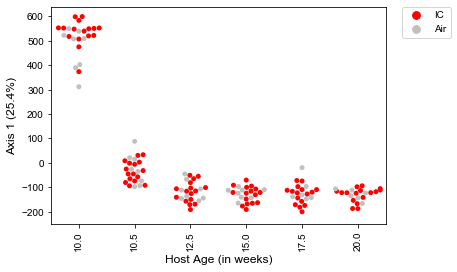

In [27]:
sns.swarmplot(x='host_age', y='Axis1_25_4', hue='exposure_type', 
              palette=['red', 'silver'], data=ic_air_metab_canberra)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (25.4%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/longIC_metab_canberra_pcoa.svg', dpi=300, bbox_inches="tight")

# IH vs IC

In [28]:
ih_ic_micro_pcoa = pd.read_table('../data/Microbiome/long_noAir_wUF_pcoa_graph.txt', sep='\t', index_col=0)
ih_ic_micro_pcoa.head()

,Axis1_32_5,Axis2_17_9,Axis3_06_5
sample-id,,,
11829.A37.147.17,0.292484,-0.122714,0.188058
11829.A43.172.9,-0.125592,0.026143,-0.028176
11829.A36.146.11,0.143783,0.101463,-0.030045
11829.A38.152.6,-0.190933,-0.051343,0.073619
11829.A41.163.10,-0.161037,0.055494,0.009238


In [29]:
ih_ic_micro_wUF = pd.merge(ih_ic_micro_pcoa, ihic_micro_md, left_index=True, right_index=True)
ih_ic_micro_wUF.head()

,Axis1_32_5,Axis2_17_9,Axis3_06_5,metab-sample-id,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
11829.A37.147.17,0.292484,-0.122714,0.188058,A37_147_17,weeks,A37.147.17,51.8,In chamber,NaN,A37,...,Mouse 147,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A43.172.9,-0.125592,0.026143,-0.028176,A43_172_9,weeks,A43.172.9,40.1,In chamber,New bag of food,A43,...,Mouse 172,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A36.146.11,0.143783,0.101463,-0.030045,A36_146_11,weeks,A36.146.11,42.7,In chamber,NaN,A36,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A38.152.6,-0.190933,-0.051343,0.073619,A38_152_6,weeks,A38.152.6,34.8,In chamber,Mixed leftovers from 2 bags of food,A38,...,Mouse 152,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
11829.A41.163.10,-0.161037,0.055494,0.009238,A41_163_10,weeks,A41.163.10,33.3,In chamber,NaN,A41,...,Mouse 163,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


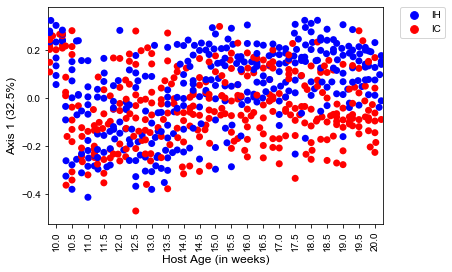

In [42]:
sns.swarmplot(x='host_age', y='Axis1_32_5', hue='exposure_type', size=7,
              palette=['blue', 'red'], data=ih_ic_micro_wUF)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (32.5%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/long_noAir_micro_wUF_pcoa.svg', dpi=300, bbox_inches="tight")

In [31]:
ih_ic_metab_pcoa = pd.read_table('../data/Metabolome/long_noAir_metab_canberra_pcoa_graph.txt', sep='\t', index_col=0)
ih_ic_metab_pcoa.head()

,Axis1_23_5,Axis2_06_3
sample-id,,
A36_144_2,106.909980,243.319748
A36_145_2,16.178035,18.446338
A36_146_2,-20.435856,-60.004868
A36_145_1,533.723998,81.572538
A36_146_11,-140.639170,-65.231712


In [32]:
ih_ic_metab_canberra = pd.merge(ih_ic_metab_pcoa, ihic_metab_md, left_index=True, right_index=True)
ih_ic_metab_canberra.head()

,Axis1_23_5,Axis2_06_3,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A36_144_2,106.909980,243.319748,11829.A36.144.2,weeks,A36.144.2,34.4,In chamber,NaN,A36,4/6/18 10:00,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,16.178035,18.446338,11829.A36.145.2,weeks,A36.145.2,34.4,In chamber,NaN,A36,4/6/18 10:00,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,-20.435856,-60.004868,11829.A36.146.2,weeks,A36.146.2,34.4,In chamber,NaN,A36,4/6/18 10:00,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,533.723998,81.572538,11829.A36.145.1,weeks,A36.145.1,Not applicable,In chamber,NaN,A36,4/3/18 10:00,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_11,-140.639170,-65.231712,11829.A36.146.11,weeks,A36.146.11,42.7,In chamber,NaN,A36,5/8/18 10:00,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


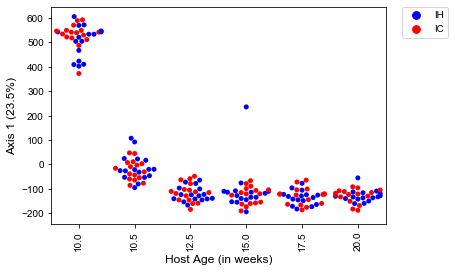

In [33]:
sns.swarmplot(x='host_age', y='Axis1_23_5', hue='exposure_type', 
              palette=['blue', 'red'], data=ih_ic_metab_canberra)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Axis 1 (23.5%)', fontsize=12)
plt.xlabel('Host Age (in weeks)', fontsize=12)
plt.xticks(rotation=90)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/long_noAir_metab_canberra_pcoa.svg', dpi=300, bbox_inches="tight")